In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Load dataset
arr_data = pd.read_csv('/content/drive/MyDrive/Sequences/arrhythmia.data', header=None)
arr_data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [5]:
# Replace non-numeric values (e.g., '?') with NaN and convert columns to numeric
arr_data.replace('?', np.nan, inplace=True)
arr_data = arr_data.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the median of each column
arr_data.fillna(arr_data.median(), inplace=True)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(arr_data)

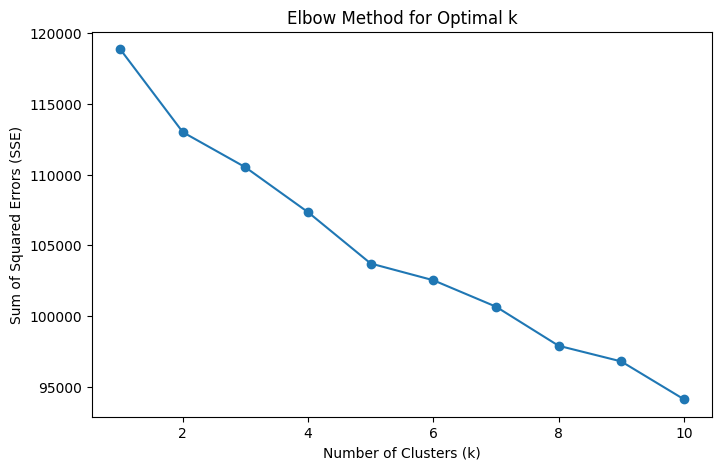

    0  1    2   3    4    5    6    7    8   9  ...   271  272  273  274  275  \
0  75  0  190  80   91  193  371  174  121 -16  ...   9.0 -0.9  0.0  0.0  0.9   
1  56  1  165  64   81  174  401  149   39  25  ...   8.5  0.0  0.0  0.0  0.2   
2  54  0  172  95  138  163  386  185  102  96  ...   9.5 -2.4  0.0  0.0  0.3   
3  55  0  175  94  100  202  380  179  143  28  ...  12.2 -2.2  0.0  0.0  0.4   
4  75  0  190  80   88  181  360  177  103 -16  ...  13.1 -3.6  0.0  0.0 -0.1   

   276   277   278  279  Cluster  
0  2.9  23.3  49.4    8        0  
1  2.1  20.4  38.8    6        1  
2  3.4  12.3  49.0   10        1  
3  2.6  34.6  61.6    1        1  
4  3.9  25.4  62.8    7        0  

[5 rows x 281 columns]


In [6]:
# Determine optimal number of clusters using Elbow Method
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Fit K-Means with optimal k (e.g., k=3)
optimal_k = 3  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the dataset
arr_data['Cluster'] = kmeans.labels_
print(arr_data.head())


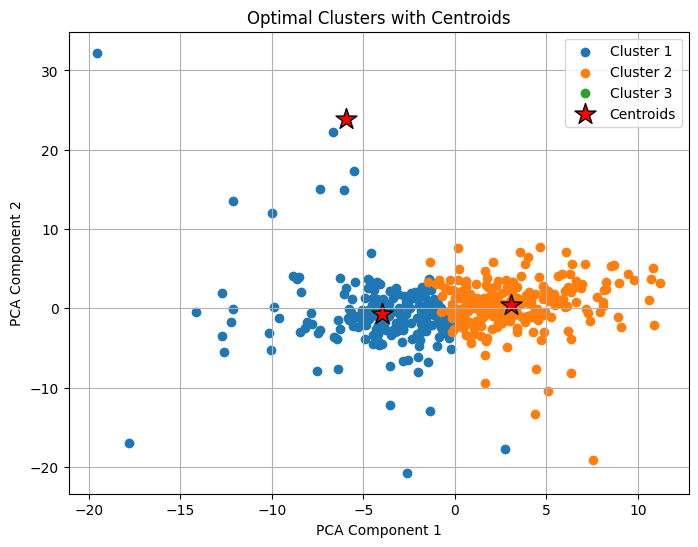


This graph shows the clustering results using the optimal number of clusters (k=3). Each cluster is shown in a different color, with the centroids marked by red '*' symbols. 
The points in each cluster are grouped based on their proximity to their respective centroid, following the distance metric used by KMeans. 
To make the clusters easier to see, the data was reduced to two dimensions using PCA, highlighting the two main components.



In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

optimal_k = 3  # Based on the elbow plot

# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the dataset
arr_data['Cluster'] = kmeans.labels_

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(data_pca[kmeans.labels_ == cluster, 0],
                data_pca[kmeans.labels_ == cluster, 1],
                label=f'Cluster {cluster + 1}')

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=250, c='red', marker='*', edgecolor='black', label='Centroids')

plt.title('Optimal Clusters with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

# Explanation of the plot
print("""
This graph shows the clustering results using the optimal number of clusters (k=3). Each cluster is shown in a different color, with the centroids marked by red '*' symbols.
The points in each cluster are grouped based on their proximity to their respective centroid, following the distance metric used by KMeans.
To make the clusters easier to see, the data was reduced to two dimensions using PCA, highlighting the two main components.
""")
